# Homework 1

## References

+ Lectures 1-3 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

from matplotlib import rc
rc('text', usetex=True)

## Student details

+ **First Name:** Jack
+ **Last Name:** Girard
+ **Email:** girard2@purdue.edu

## Problem 1

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information I is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

<h4>Student note on notation:</h4> The below notation substitutions will be made:

+ 'not' or complement: $\neg A \equiv \overline{A}$
+ 'and' or intersection: $A,B \equiv AB \equiv A \cap B$
+ 'or' or union: $A + B \equiv A \cup B$

<h4>Student note on the sample space:</h4>
The sample space $I$ (or commonly specified as $\Omega$) will be excluded from most steps below. It is assumed that the sample space exists in order to take a probability measure.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.<br>
**Answer:**
<br>
Based on the given information: <br>
$$
p(B|I) = p(B) = 0.4\% = 0.004
$$

B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.<br>
**Answer:**
<br>
Based on the given information: <br>
$$
p(A|B,I) = p(A|B) = 80\% = 0.8
$$

C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.<br>
**Answer:**
$$
p(A|\neg B, I) = p(A|\overline{B})
$$
Based on given information:

$$
p(\overline{A}|\overline{B}, I) = 90\% = 0.9
$$

Using the obvious rule:

$$
p(A|\overline{B}) + p(\overline{A}|\overline{B}) = 1
$$

$$
p(A|\overline{B}) = 1 - p(\overline{A}|\overline{B}) = 1 - 0.9 = 0.1
$$

D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.<br>
**Answer:**

Using Bayes' Theorem:

$$
p(B|A, I) = \frac{p(A|B, I)p(B|I)}{p(A|I)} = \frac{p(A|B)p(B)}{p(A)} = p(B|A)
$$
<br>
Solving for $p(A)$ first using the Law of Total Probability and the product rule:

$$
p(A) = p(A \cap I) = p(A \cap (B \cup \overline{B}))
$$

$$
 = p((A \cap B) \cup (A \cap \overline{B}))
$$

$$
 = p(A \cap B) + p(A \cap \overline{B})
$$

$$
 = p(A|B)p(B) + p(A|\overline{B})p(\overline{B})
$$

$$
 = (0.8)(0.004) + (0.1)(0.996) = 0.1028
$$

Solving for $p(B|A)$:

$$
p(B|A) = \frac{p(A|B)p(B)}{p(A)}
$$

$$
 = \frac{(0.8)(0.004)}{0.1028} = 0.031128 \approx 3.1\%
$$

E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about about the patient? Is the test useful?<br>
**Answer:**

Using Bayes' Theorem:
$$
p(B|\neg A, I) = \frac{p(\neg A|B, I)p(B|I)}{p(\neg A|I)} = \frac{p(\overline{A}|B)p(B)}{p(\overline{A})} = p(B|\overline{A})
$$

Using the obvious rule:

$$
 = \frac{(1 - p(A|B))p(B)}{1 - p(A)}
$$

$$
 = \frac{(1 - 0.8)(0.004)}{1 - 0.1028}
$$

$$
 = 0.000891663 \approx 0.09\%
$$

The test does change our prior state of knowledge about the patient. Without a test, the probability of a patient having tuberculosis is, as stated above, 0.4%. Given that a patient tests negative for tuberculosis, the probability of them having tuberculosis decreases to approximately 0.09%. In addition, from part D, given that a patient tests positive for tuberculosis, the probability of them having tuberculosis increases to approximately 3.1%. The test is useful, because no matter the test result (positive or negative) the prior state of knowledge about the patient is changed (and we inherently know more about the patient's statistics about having tuberculosis): $p(B|A) > p(B)$; $p(B|\overline{A}) < p(B)$

F. What would a good test look like? Find values for 

$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$

and

$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$

so that

$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$

There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis<br>
**Answer:**
$$
p(A|B,I) = p(A|B); p(A| \neg B, I) = p(A|\overline{B}); p(B|A, I) = p(B|A)
$$

Using Bayes' Theorem and Law of Total Probability:

$$
p(B|A, I) = \frac{p(A|B, I)p(B|I)}{p(A|I)} = \frac{p(A|B)p(B)}{p(A)} = p(B|A) = 0.99
$$

$$
 = \frac{p(A|B)p(B)}{p(A|B)p(B) + p(A|\overline{B})p(\overline{B})}
$$

Substitute $x$ and $y$ for variables $p(A|B)$ and $p(A|\overline{B})$, respectively:

$$
 = \frac{xp(B)}{xp(B) + yp(\overline{B})} = \frac{0.004x}{0.004x + 0.996y} = 0.99
$$

$$
0.99(0.004x + 0.996y) = 0.004x
$$

$$
0.00396x + 0.98604y = 0.004x
$$

$$
0.98604y = 0.00004x
$$

Using slope-intercept form $y = mx + b$ to generate equation for the line:

$$
y = 0.000040566x
$$

A line of solutions exist for $p(A|B)$ contained in $[0, 1]$ (where $p(A|B)$ reaches maximum probability of 1 first). The solutions are plotted and can be visualized in the cell below. Intuitively, a quality tuberculosis test could mean that if the patient has tuberculosis then the probability of a positive test $p(A|B)$ would be close to 1. As a result, if the patient does not have tuberculosis, then the probability of a positive test $p(A|\overline{B})$ would be approximately $4 \times 10^{-5}$ to satisfy the $p(B|A) = 0.99$ condition.

After some preliminary research, it appears that the sensitivity of tuberculosis tests, $p(A|B)$, can range from 25% to nearly 100% depending on symptom type, symptom duration, and patient age [1, 2]. One case study reported 62.5% sensitivity in children 25-36 months old and 100% sensitivity in children older than 49 months [1]. Another case study reported sensitivity ranges of 25%-50% for patients with prolonged cough and 77%-84% for any sympton of any duration [2]. Based on these published research results, a 'good' test may be realistically described as one with a $p(A|B)$ value of approximately 0.7-0.9.

Sources:

[1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4595419/

[2] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6782021/

[3] https://en.wikipedia.org/wiki/Sensitivity_and_specificity

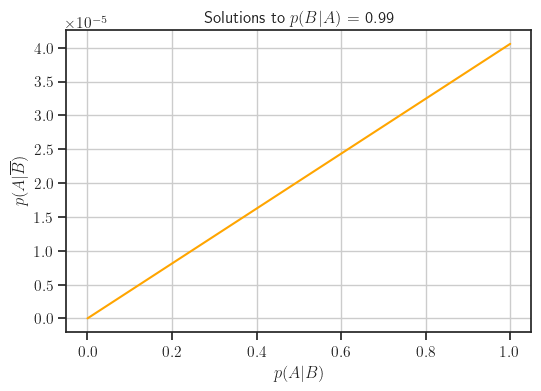

In [2]:
m = 0.000040566
x = np.linspace(0, 1, num=100)
y = m*x

fig, ax = plt.subplots()
ax.plot(x, y, color='orange')

ax.set(xlabel='$p(A|B)$', ylabel='$p(A|\overline{B})$', 
       title='Solutions to $p(B|A)$ = 0.99')
ax.grid()

## Problem 2 - Practice with discrete random variables

Consider the Categorical random variable:

$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$

taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

In [3]:
# Initial Setup:
import scipy.stats as st
# defining probabilities:
ps = [0.3, 0.1, 0.2, 0.4]
# corresponding values that X takes
xs = np.array([0, 1, 2, 3])
# define the categorical rv using scipy.stats.rv_discrete
X = st.rv_discrete(name="Custom Categorical", values=(xs, ps))

A. The expectation $\mathbb{E}[X]$.

**Answer:**

In [4]:
print(f"E[X] = {X.expect():.2f}")

E[X] = 1.70


B. The variance $\mathbb{V}[X]$.

**Answer:**

In [5]:
print(f"V[X] = {X.var():.2f}")

V[X] = 1.61


C. Plot the probability mass function of $X$.

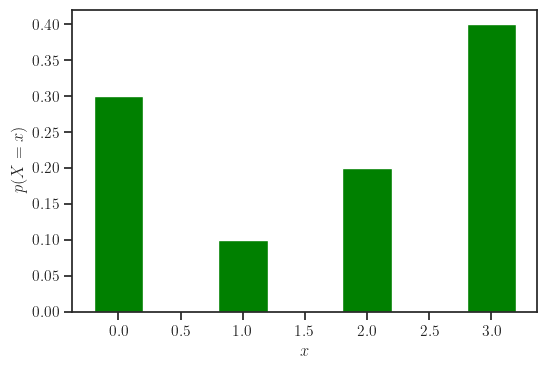

In [6]:
fig, ax = plt.subplots()
ax.bar(xs, X.pmf(xs), color='green', width=0.4)
ax.set_xlabel("$x$")
ax.set_ylabel("$p(X = x)$");

D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:**
<br>
Let $A = \{0, 2\}$
$$
p(X \in A) = \sum_{x \in A}^{}p(x)
$$

$$
 = p(X = 0) + p(X = 2) = 0.3 + 0.2 = 0.5
$$

In [7]:
setA = [0, 2]
p_XsetA = X.pmf(0) + X.pmf(2)
print(f"p(X in {{0,2}}) = {p_XsetA:.2f}")

p(X in {0,2}) = 0.50


E. Find $\mathbb{E}[4X + 3]$.

**Answer:**
<br>
$$
\mathbb{E}[4X + 3] = \mathbb{E}[4X] + \mathbb{E}[3]
$$

$$
 = 4\mathbb{E}[X] + 3
$$

$$
 = 4(1.7) + 3 = 9.80
$$

In [8]:
E_4Xp3 = 4*X.expect() + 3
print(f"E[4X + 3] = {E_4Xp3:.2f}")

E[4X + 3] = 9.80


F. Find $\mathbb{V}[4X + 3]$.

**Answer:**
<br>
$$
\mathbb{V}[4X + 3] = \mathbb{V}[4X]
$$

$$
 = 4^{2}\mathbb{V}[X] = 16(1.61) = 25.76
$$

In [9]:
V_4Xp3 = 4**2*X.var()
print(f"V[4X + 3] = {V_4Xp3:.2f}")

V[4X + 3] = 25.76


## Problem 3 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

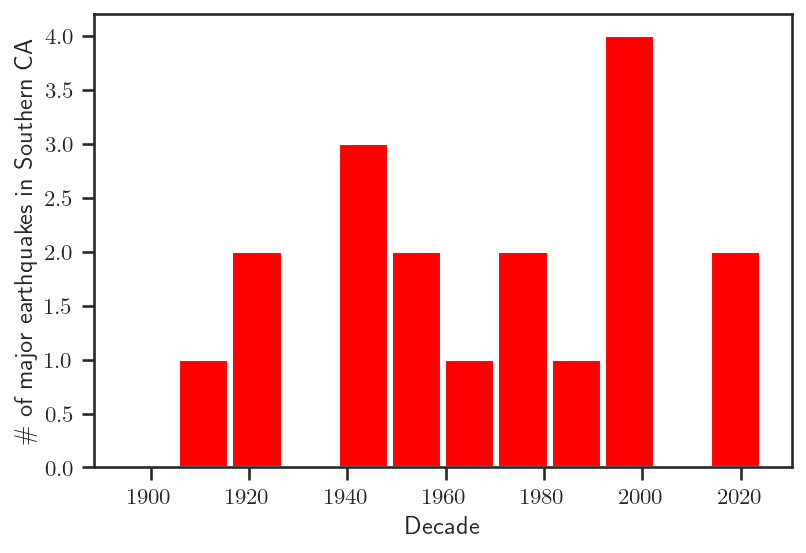

In [10]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019 
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10, color='red')
ax.set_xlabel('Decade')
ax.set_ylabel('\# of major earthquakes in Southern CA');

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:

$$
X \sim \operatorname{Poisson}(r),
$$

where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [11]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [12]:
import scipy.stats as st
X = st.poisson(r)

A. Plot the probability mass function of ``X``.

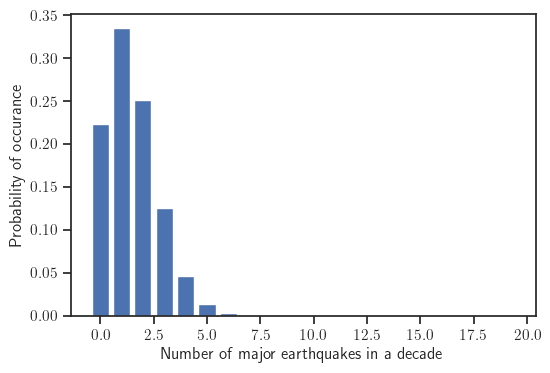

In [13]:
ks = range(20)
fig, ax = plt.subplots()
ax.bar(ks, X.pmf(ks))
ax.set_xlabel('Number of major earthquakes in a decade')
ax.set_ylabel('Probability of occurance');

B. What is the probability that at least one major earthquake will occur during the next decade?

**Answer:**
<br>
$$
p(X \geq 1) = 1 - p(X = 0)
$$

$$
 = 1 - 0.2231 = 0.7769
$$

In [14]:
p_oneOrMore = 1 - X.pmf(0)
print('p(X >= 1) = {0:1.4f}'.format(p_oneOrMore))

p(X >= 1) = 0.7769


C. What is the probability that at least one major earthquake will occur during the next two decades?
Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
**Answer:**
<br>
It is known that:


If $X_{i} \sim \operatorname{Poisson}(\lambda_{i})$ for $i = 1,...,n$ are independent, then $\sum_{i = 1}^{n}X_{i} \sim \operatorname{Poisson}(\sum_{i = 1}^{n}\lambda_{i})$

Following this statement, it is true then that in this situation:

<center> $\lambda_{i} = r$ for $i = 1,...,n$ </center>

$$
X_{1} + X_{2} = Y \sim \operatorname{Poisson}(r+r)
$$

In [15]:
newR = r + r
Y = st.poisson(newR)
p_oneOrMoreNext2 = 1 - Y.pmf(0)
print('p(Y = X1 + X2 >= 1) = {0:1.4f}'.format(p_oneOrMoreNext2))

p(Y = X1 + X2 >= 1) = 0.9502


D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
**Answer:**
<br>
$$
Y_{n} = \sum_{i = 1}^{n}X_{i}
$$

Since all $X_{i}$ are independent and identically distributed:

$$
Y_{n} \sim \operatorname{Poisson}(\sum_{i = 1}^{n}r)=\operatorname{Poisson}(nr)
$$

For n = 5:

$$
Y_{n} \sim \operatorname{Poisson}(5r)
$$

In [16]:
newR = 5*r
Y = st.poisson(newR)
p_oneOrMoreNext5 = 1 - Y.pmf(0)
print('p(Y >= 1) = {0:1.4f}'.format(p_oneOrMoreNext5))

p(Y >= 1) = 0.9994
